# **Prediction Of Lung Cancer - Part 1**
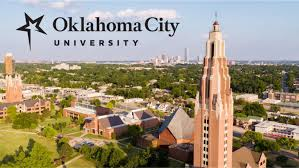

In 2019, 221,097 people were diagnosed with lung cancer; 112,003 were men, and 109,094 were women. In 2019, men (59.2 per 100,000 population) were 23% more likely than women (48.1 per 100,000 population) to be diagnosed with lung cancer.
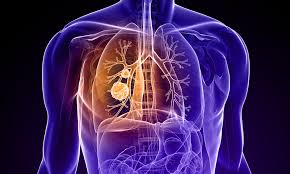


This project performs LogisticRegression and also uses TensorFlow to perform Malchone learning and prediciction.

In [ ]:
#Importing libraries as required for this project.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [ ]:
#fetching data from a csv file.
df = pd.read_csv("/content/cancer patient data sets.csv")

In [ ]:
#printing variables and showcasing the head of the data.
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#Fetching information on dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
# dropping unnecessary variables to perform analysis on data.
df.drop("Patient Id",axis=1,inplace=True)
df.drop("index",axis=1,inplace=True)

In [ ]:
# looking for null or n/a values in the data set and eliminating them if found.
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
# using lable encoder from the sckit learn library.
label_encoding = LabelEncoder()
df["Level"] = label_encoding.fit_transform(df["Level"])

In [ ]:
# fetching informaion on data after data-cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [ ]:
#fetching head of the dataset as did before.
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


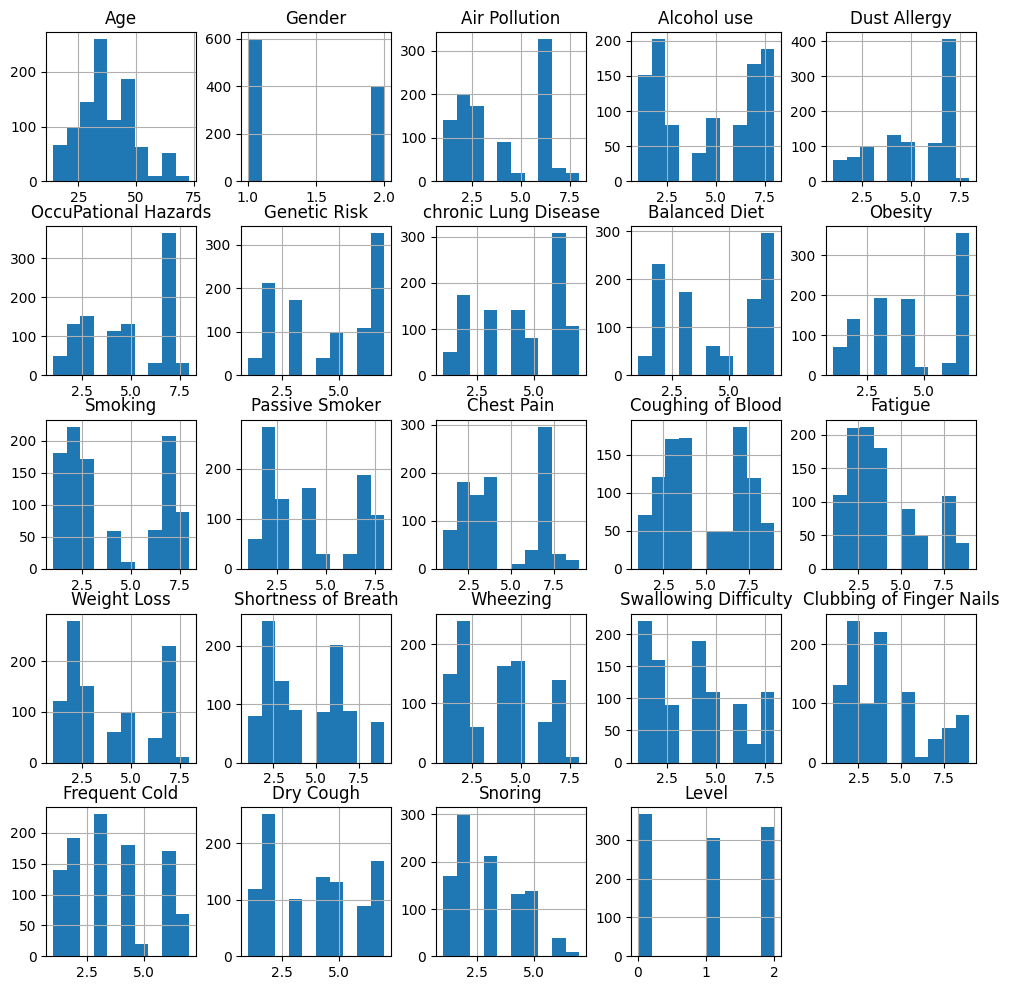

In [ ]:
# importing matplotlib library for visualizing data.
import matplotlib.pyplot as plt

# creating an histogram for all variables.
df.hist(figsize=(12,12))
plt.show()

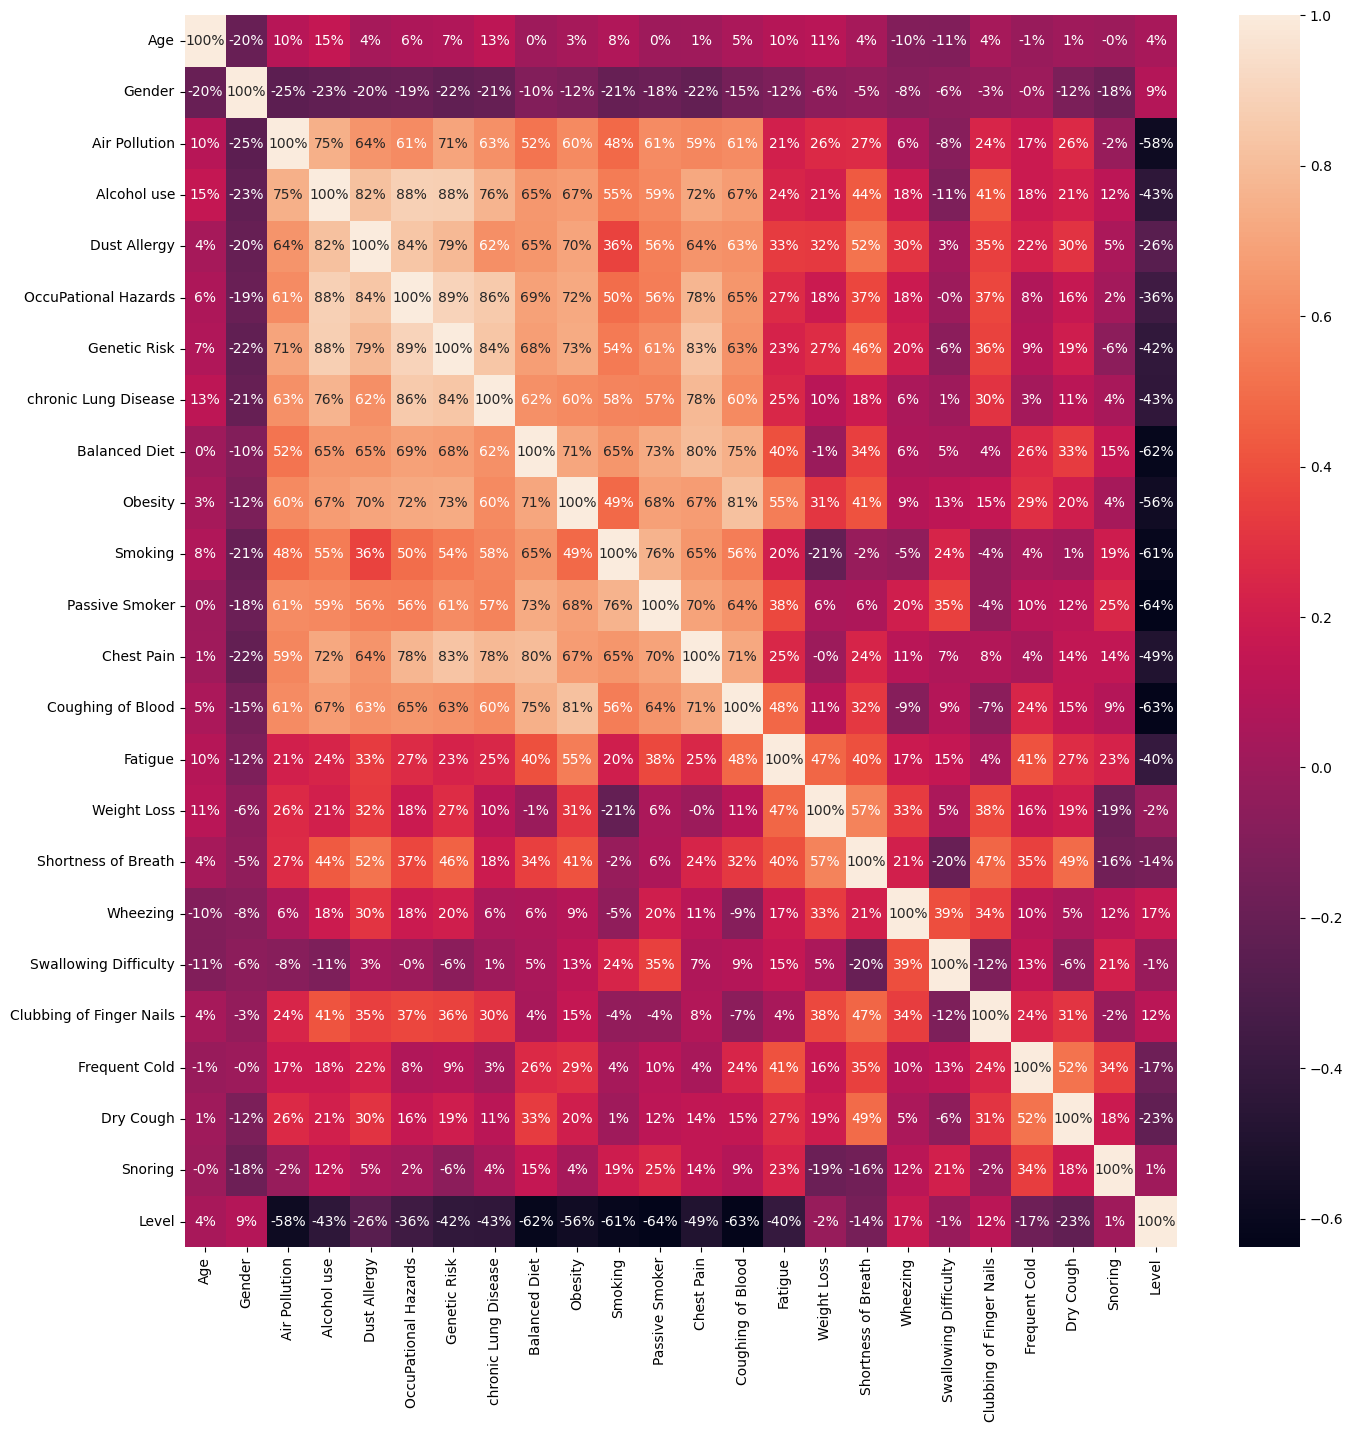

In [ ]:
# plotting a heatmap for visualizing high risk factors.
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

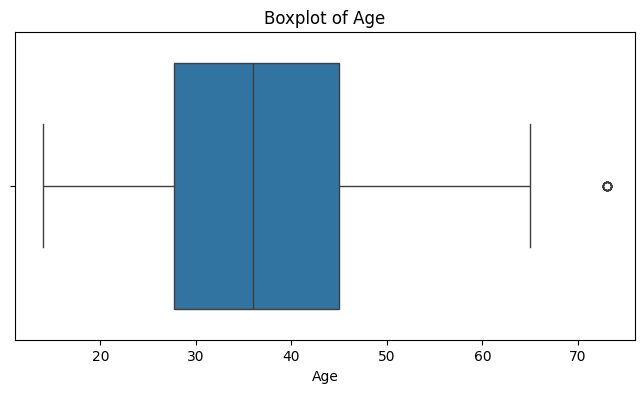

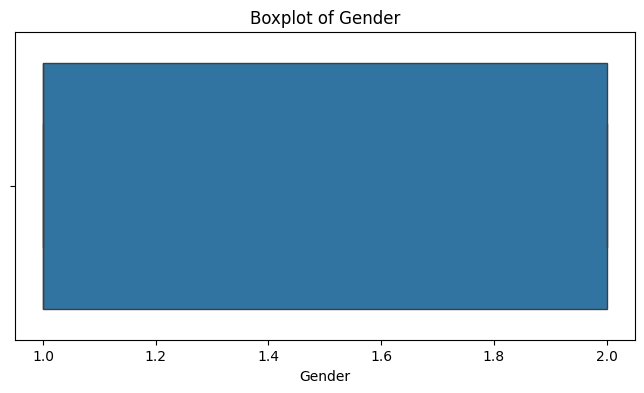

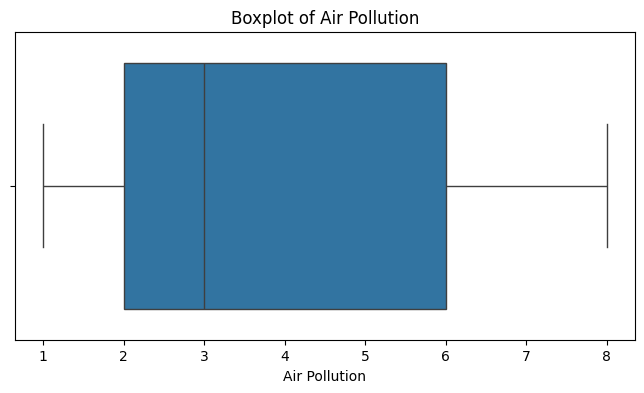

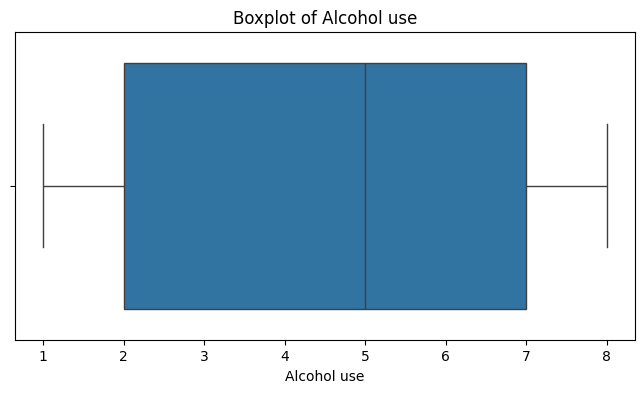

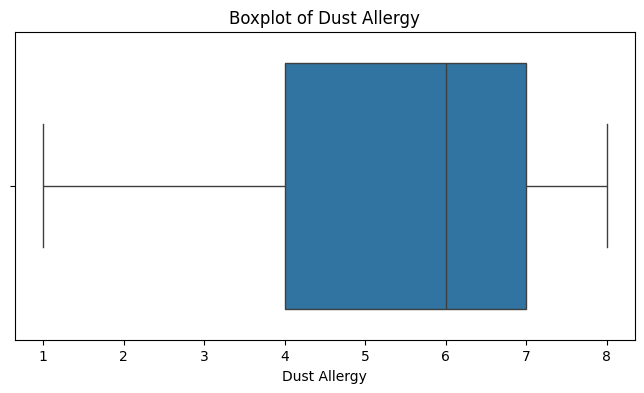

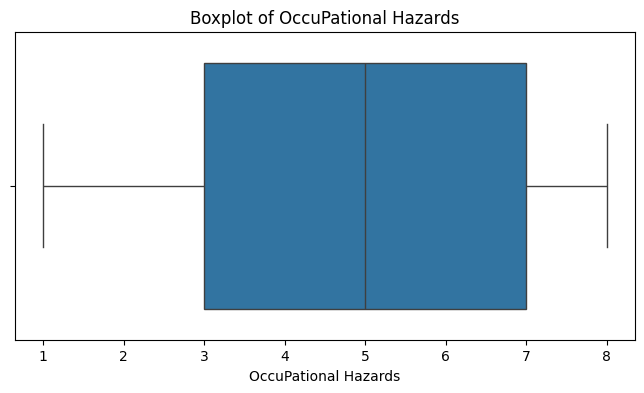

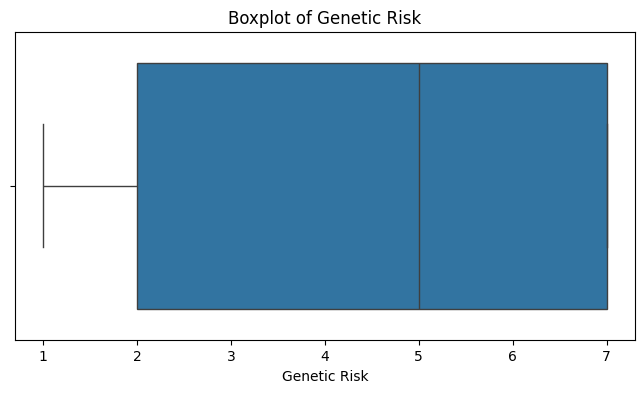

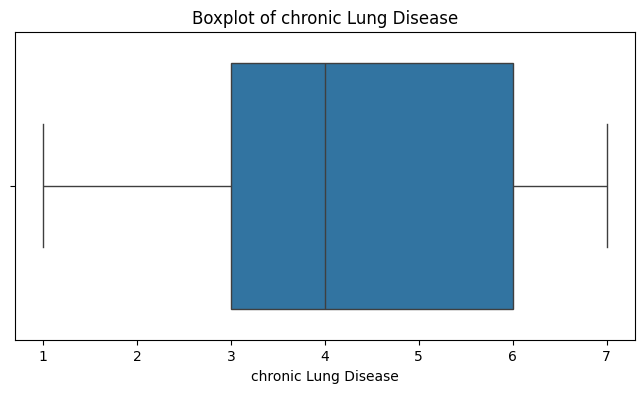

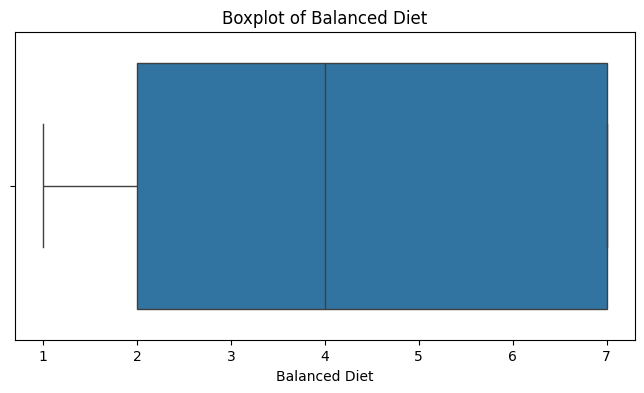

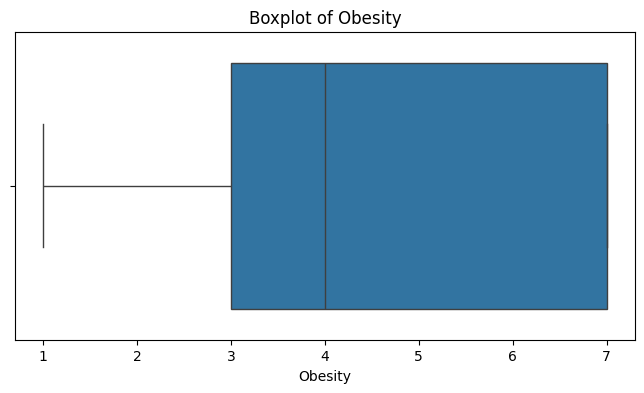

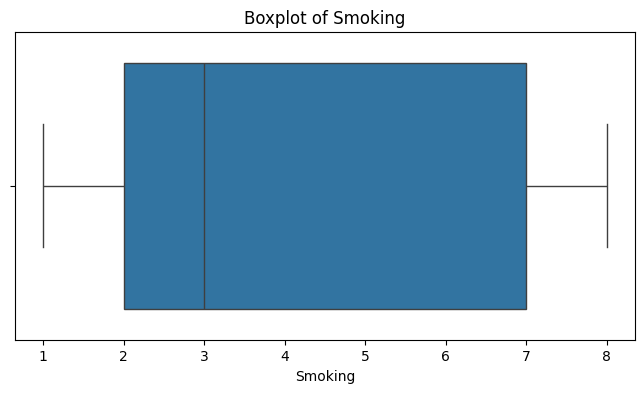

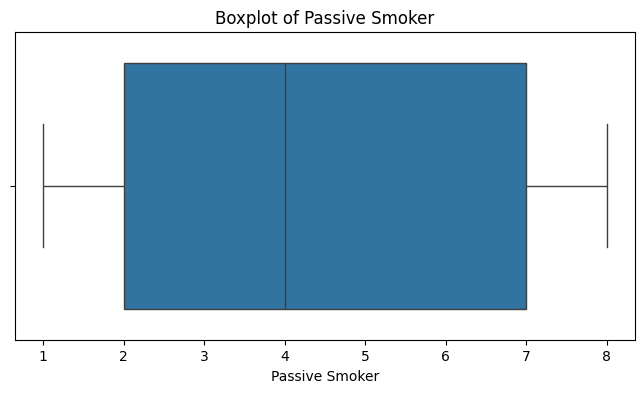

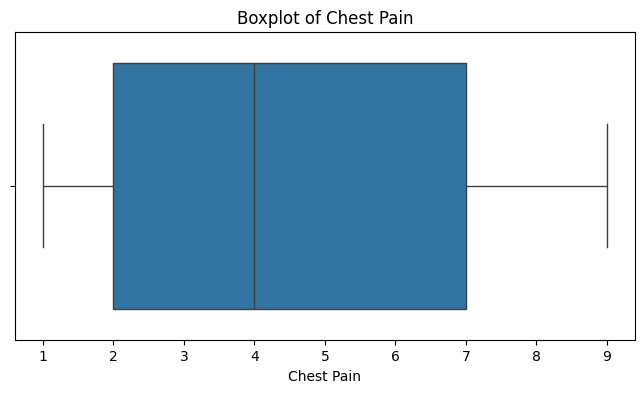

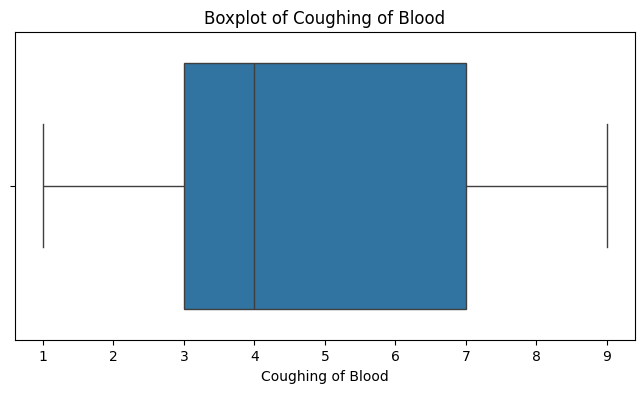

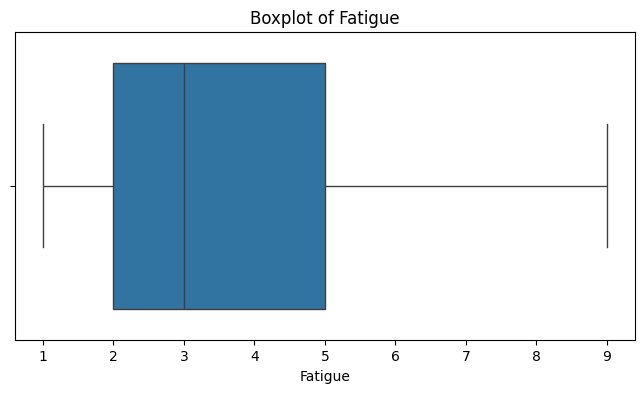

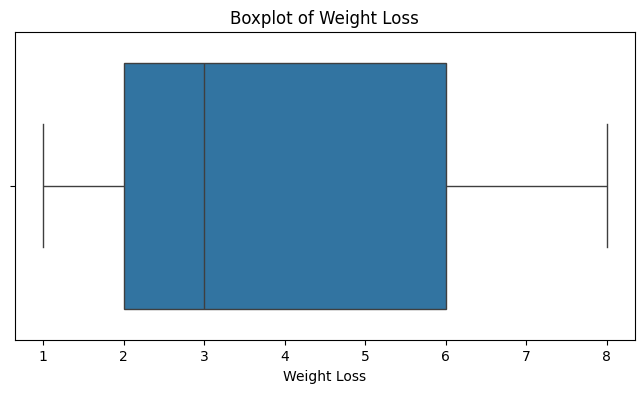

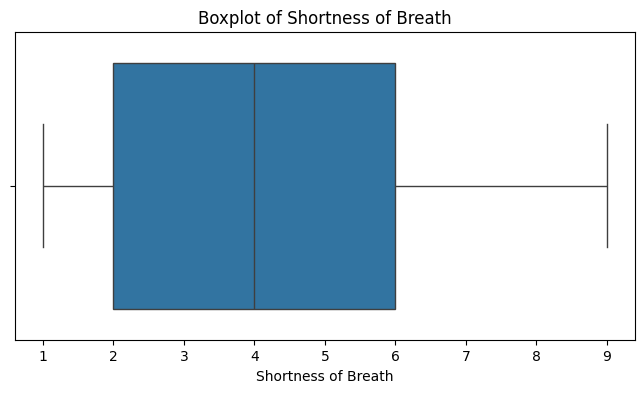

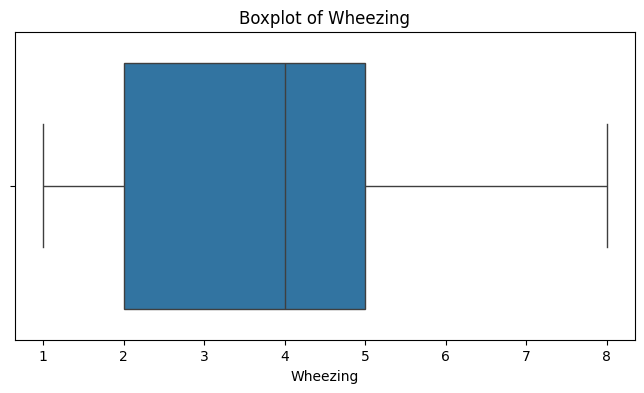

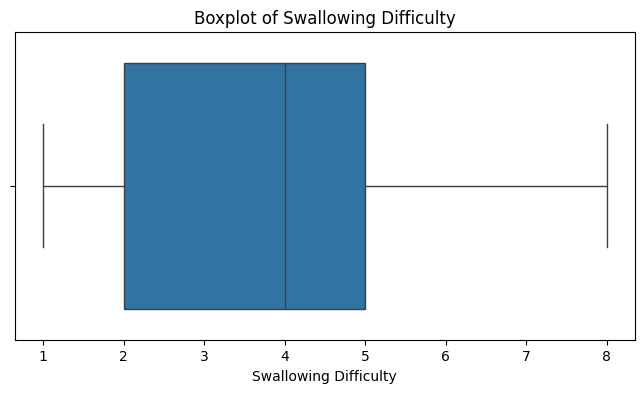

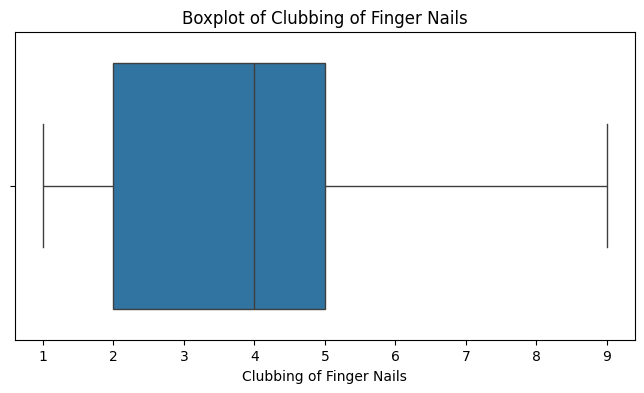

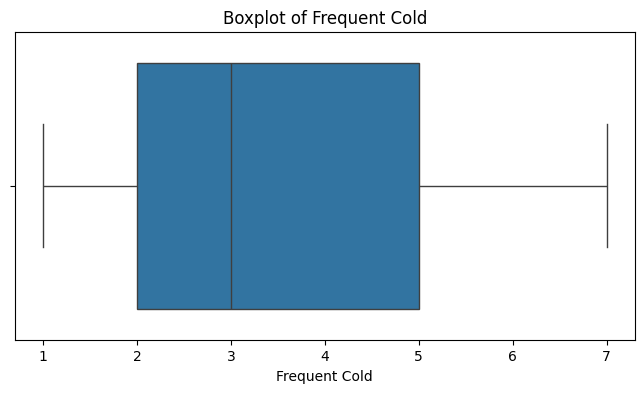

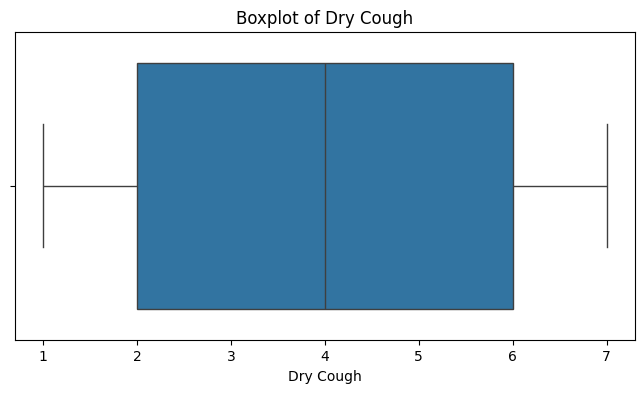

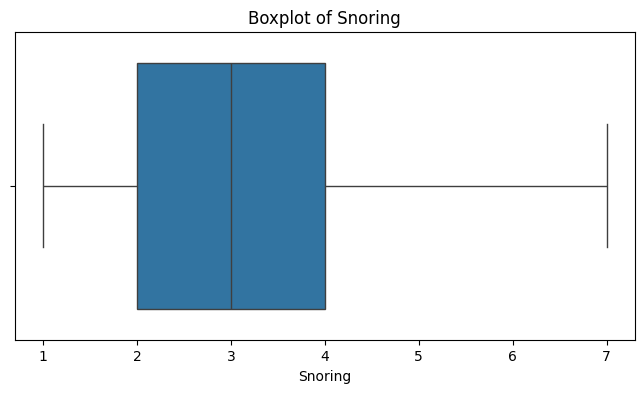

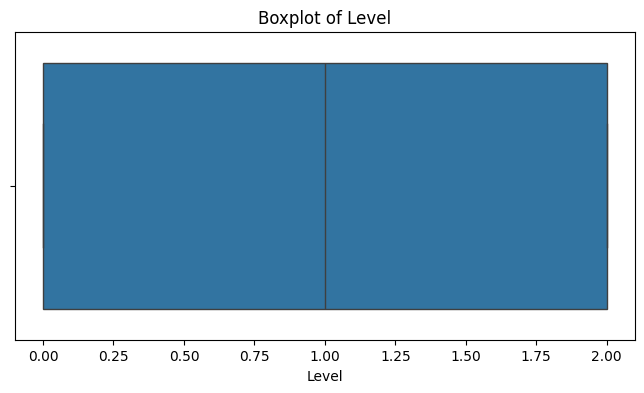

In [ ]:
# using a box plot map to show how each variable affects the patient.
for column in df:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

In [ ]:
# preparing the model for prediction.
X = df.drop("Level",axis=1)
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# using Kneigbours classifier and calculating its accuracy.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.995


In [ ]:
# using Decision tree classifier and calculating its accuracy.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# using Logistic Regression model for prediction of risk of a patient getting lung cancer.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.995


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# printing the dataset to check before performing the prediction using TensorFlow.
print(df.dtypes)

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object


In [ ]:
# Creating a Keras model from TensorFlow for Machine Learning.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(23, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# printing the size of training and test data.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 23)
X_test shape: (200, 23)


In [ ]:
# performing Machine learning.
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 2s 33ms/step - loss: 2.4000 - accuracy: 0.3775 - val_loss: 0.9940 - val_accuracy: 0.5200
Epoch 2/30
25/25 [==============================] - 0s 8ms/step - loss: 0.9085 - accuracy: 0.5625 - val_loss: 0.6216 - val_accuracy: 0.7650
Epoch 3/30
25/25 [==============================] - 0s 9ms/step - loss: 0.7022 - accuracy: 0.7013 - val_loss: 0.5293 - val_accuracy: 0.8200
Epoch 4/30
25/25 [==============================] - 0s 9ms/step - loss: 0.6141 - accuracy: 0.7588 - val_loss: 0.4686 - val_accuracy: 0.8650
Epoch 5/30
25/25 [==============================] - 0s 12ms/step - loss: 0.5530 - accuracy: 0.7700 - val_loss: 0.4189 - val_accuracy: 0.8750
Epoch 6/30
25/25 [==============================] - 0s 8ms/step - loss: 0.5108 - accuracy: 0.7987 - val_loss: 0.3852 - val_accuracy: 0.8800
Epoch 7/30
25/25 [==============================] - 0s 8ms/step - loss: 0.4783 - accuracy: 0.8100 - val_loss: 0.3584 - val_accuracy: 0.9150
Epoch 8/30
25/25 [

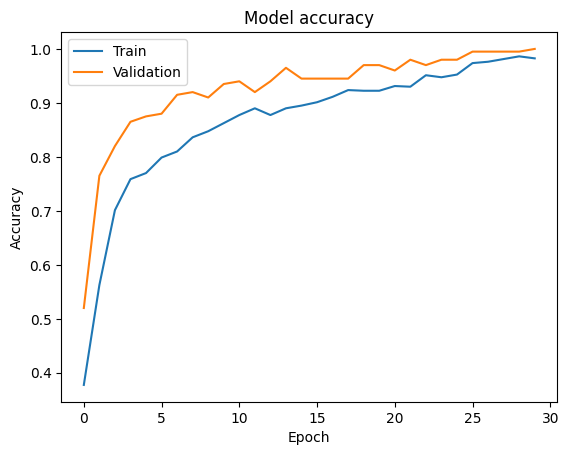

In [ ]:
# plotting and comparing the accuracy of the model.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()